Found 1041 documents.
Unique URLS: 100
Total documents: 1041

Total length: 788825
Average length: 757.7569644572526
Max length: 1000

Total tokens: 170187
Average tokens: 163.4841498559078
Max tokens: 321


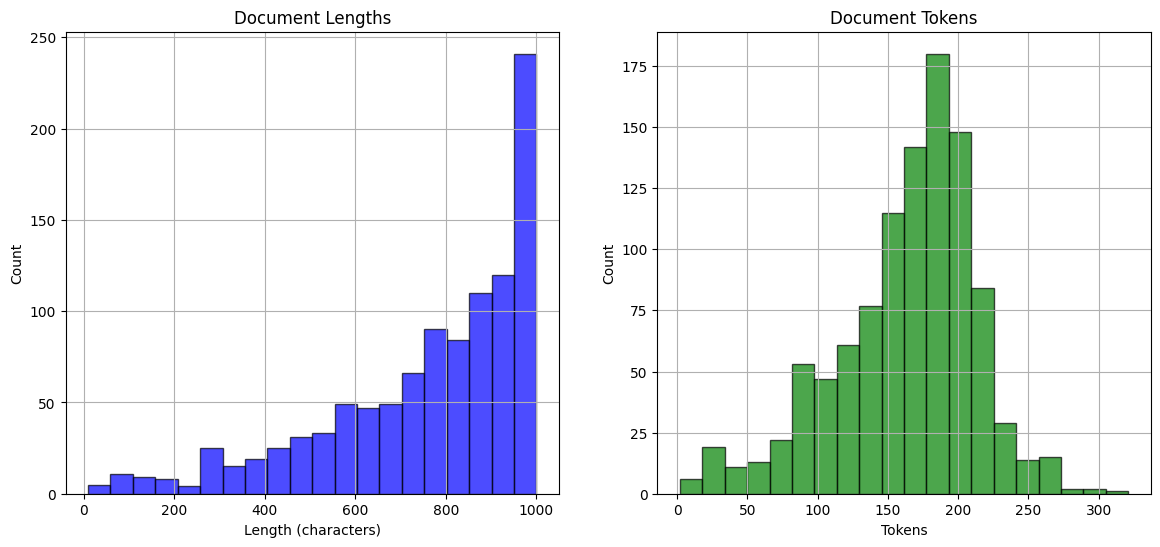

In [4]:
import tiktoken
import matplotlib.pyplot as plt
import pandas as pd
from src.utils.vector_store_manager import VectorStoreManager
from dotenv import load_dotenv
load_dotenv()

document_processor = VectorStoreManager('au-blog-rag')

def count_tokens(text, model="gpt-4o-mini"):
    encoding = tiktoken.encoding_for_model(model)
    t = encoding.encode(text)
    return len(t)

docs = document_processor.get_all_documents()
print(f"Unique URLS: {len(set([doc['metadata']['source'] for doc in docs]))}")

lengths = [len(doc['content']) for doc in docs]
tokens = [count_tokens(doc['content']) for doc in docs]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.Series(lengths).hist(bins=20, alpha=0.7, color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Document Lengths')
axes[0].set_xlabel('Length (characters)')
axes[0].set_ylabel('Count')

pd.Series(tokens).hist(bins=20, alpha=0.7, color='green', edgecolor='black', ax=axes[1])
axes[1].set_title('Document Tokens')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Count')


print(f"Total documents: {len(lengths)}\n")

print(f"Total length: {sum(lengths)}")
print(f"Average length: {sum(lengths)/len(lengths)}")
print(f"Max length: {max(lengths)}\n")

print(f"Total tokens: {sum(tokens)}")
print(f"Average tokens: {sum(tokens)/len(tokens)}")
print(f"Max tokens: {max(tokens)}")